In [2]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


In [3]:
# np.random.seed(seed=42)

# T = 100
# y = np.zeros((T,))

# for i in range(1,T):
#     y[i] = 0.95 * y[i-1] + np.random.normal()

# print(y)


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


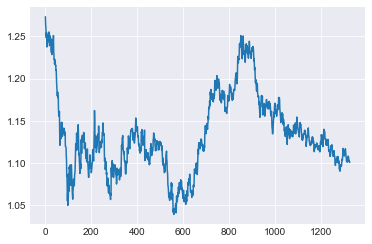

In [4]:
import pandas as pd

data = pd.read_csv("./EUR_USD_data.csv")
# print(data.head())
X=data.as_matrix(columns=['Price'])
price=np.reshape(X,1328)
plt.plot(price)

In [5]:
tau = 1.0
with pm.Model() as arprice:
    beta = pm.Normal('beta', mu=0, sigma=tau)
    likelihood = pm.AR('likelihood', beta, sigma=1.0, observed=price)

# with pm.Model() as ar2:
#     beta = pm.Normal('beta', mu=0, sigma=tau, shape=2)
#     likelihood = pm.AR('likelihood', beta, sigma=1.0, observed=y)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '7744' (I am process '10732')


In [6]:
with arprice:
    trace = pm.sample(1000, tune=4000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:14<00:00, 1348.04draws/s]


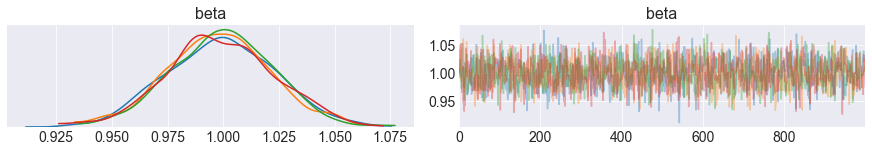

In [7]:
az.plot_trace(trace);

In [8]:
pmup = ((price[:-1]**2).sum() + tau**-2)**-1 * np.dot(price[:-1],price[1:])
pVp =  ((price[:-1]**2).sum() + tau**-2)**-1

print('Mean: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].mean(), pmup))
print('Std: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].std(), np.sqrt(pVp)))

Mean: 0.999 (exact = 0.999)
Std: 0.024 (exact = 0.024)


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


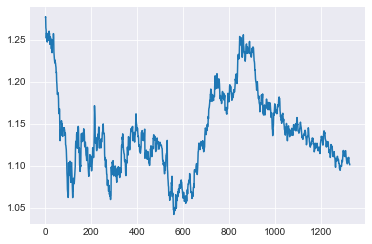

In [11]:
X=data.as_matrix(columns=['High'])
high=np.reshape(X,1328)
plt.plot(high)

In [12]:
tau = 1.0
with pm.Model() as arhigh:
    beta = pm.Normal('beta', mu=0, sigma=tau)
    likelihood = pm.AR('likelihood', beta, sigma=1.0, observed=high)

In [17]:
with arhigh:
    trace = pm.sample(1000, tune=4000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:14<00:00, 1338.77draws/s]


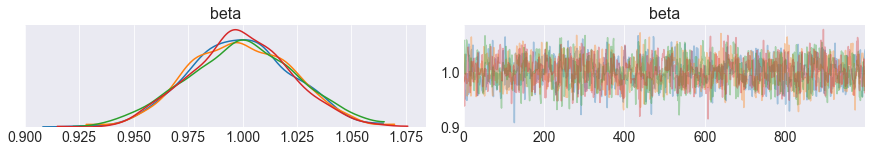

In [18]:
az.plot_trace(trace);

In [19]:
hmup = ((high[:-1]**2).sum() + tau**-2)**-1 * np.dot(high[:-1],high[1:])
hVp =  ((high[:-1]**2).sum() + tau**-2)**-1

print('Mean: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].mean(), hmup))
print('Std: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].std(), np.sqrt(hVp)))

Mean: 0.999 (exact = 0.999)
Std: 0.024 (exact = 0.024)


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


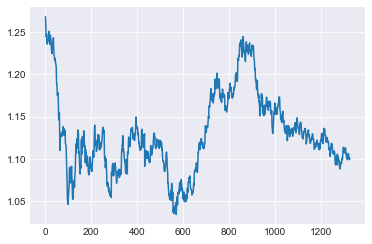

In [20]:
X=data.as_matrix(columns=['Low'])
low=np.reshape(X,1328)
plt.plot(low)

In [21]:
tau = 1.0
with pm.Model() as arlow:
    beta = pm.Normal('beta', mu=0, sigma=tau)
    likelihood = pm.AR('likelihood', beta, sigma=1.0, observed=low)

In [22]:
with arlow:
    trace = pm.sample(1000, tune=4000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:16<00:00, 1239.10draws/s]
The acceptance probability does not match the target. It is 0.8941406615419091, but should be close to 0.8. Try to increase the number of tuning steps.


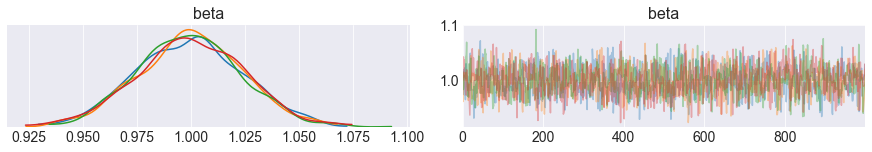

In [23]:
az.plot_trace(trace);

In [24]:
lmup = ((low[:-1]**2).sum() + tau**-2)**-1 * np.dot(low[:-1],low[1:])
lVp =  ((low[:-1]**2).sum() + tau**-2)**-1

print('Mean: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].mean(), lmup))
print('Std: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].std(), np.sqrt(lVp)))

Mean: 1.000 (exact = 0.999)
Std: 0.024 (exact = 0.024)


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


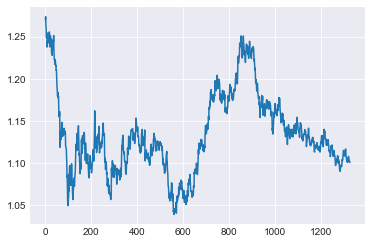

In [25]:
X=data.as_matrix(columns=['Open'])
oopen=np.reshape(X,1328)
plt.plot(oopen)

In [26]:
tau = 1.0
with pm.Model() as aropen:
    beta = pm.Normal('beta', mu=0, sigma=tau)
    likelihood = pm.AR('likelihood', beta, sigma=1.0, observed=oopen)

In [27]:
with aropen:
    trace = pm.sample(1000, tune=4000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:14<00:00, 1354.60draws/s]


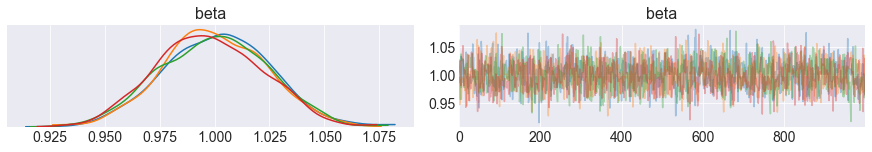

In [28]:
az.plot_trace(trace);

In [29]:
omup = ((oopen[:-1]**2).sum() + tau**-2)**-1 * np.dot(oopen[:-1],oopen[1:])
oVp =  ((oopen[:-1]**2).sum() + tau**-2)**-1

print('Mean: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].mean(), omup))
print('Std: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].std(), np.sqrt(oVp)))

Mean: 1.000 (exact = 0.999)
Std: 0.024 (exact = 0.024)


C:\Users\DELL\Anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


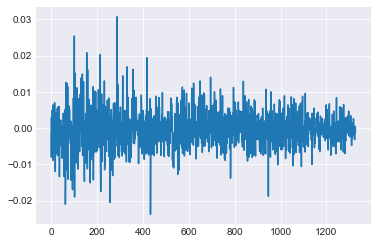

In [30]:
X=data.as_matrix(columns=['per_change'])
change=np.reshape(X,1328)
plt.plot(change)

In [31]:
tau = 1.0
with pm.Model() as archange:
    beta = pm.Normal('beta', mu=0, sigma=tau)
    likelihood = pm.AR('likelihood', beta, sigma=1.0, observed=change)

In [32]:
with archange:
    trace = pm.sample(1000, tune=4000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
Sampling 4 chains, 0 divergences: 100%|██████████| 20000/20000 [00:14<00:00, 1356.17draws/s]


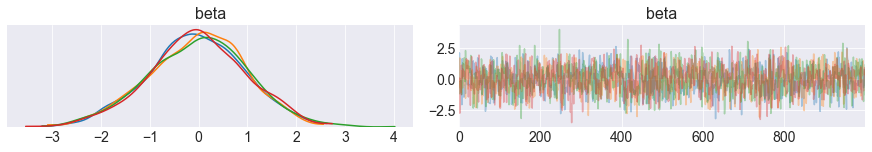

In [33]:
az.plot_trace(trace);

In [34]:
cmup = ((change[:-1]**2).sum() + tau**-2)**-1 * np.dot(change[:-1],change[1:])
cVp =  ((change[:-1]**2).sum() + tau**-2)**-1

print('Mean: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].mean(), cmup))
print('Std: {:5.3f} (exact = {:5.3f})'.format(trace['beta'].std(), np.sqrt(cVp)))

Mean: -0.026 (exact = -0.001)
Std: 0.999 (exact = 0.982)


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy.stats as stats
# import math

# mu = mup
# variance = Vp
# sigma = math.sqrt(variance)
# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# plt.plot(x, stats.norm.pdf(x, mu, sigma))
# plt.show()